# FINAL ASSIGNMENT
**RECURRENT NEURAL NETWORK**

- How to load and prepare text for modeling.
- How to develop a RNN for text classification sentiment analysis with Tensorflow and improve model performance.

**Install library yang diperlukan**

In [1]:
!pip install contractions
!pip install textsearch
!pip install tqdm
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/heruhermawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/heruhermawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import string

from tensorflow.keras import layers
from tensorflow.keras import losses

%matplotlib inline

**Load Dataset**

(Data yang error saat loading di-skip)

In [3]:
df_toys = pd.read_csv('amazon_reviews_us_Toys_v1_00.tsv',
                   sep='\t',
                   error_bad_lines=False)

/var/folders/qd/sxt36t697f1gv6dnyy0_qjkr0000gn/T/ipykernel_8574/2904491524.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_toys = pd.read_csv('amazon_reviews_us_Toys_v1_00.tsv',
b'Skipping line 7003: expected 15 fields, saw 22\nSkipping line 22430: expected 15 fields, saw 22\nSkipping line 25418: expected 15 fields, saw 22\nSkipping line 43786: expected 15 fields, saw 22\nSkipping line 46566: expected 15 fields, saw 22\nSkipping line 63511: expected 15 fields, saw 22\n'
b'Skipping line 69097: expected 15 fields, saw 22\nSkipping line 74615: expected 15 fields, saw 22\nSkipping line 79354: expected 15 fields, saw 22\nSkipping line 81566: expected 15 fields, saw 22\nSkipping line 89464: expected 15 fields, saw 22\nSkipping line 93104: expected 15 fields, saw 22\nSkipping line 95570: expected 15 fields, saw 22\nSkipping line 96587: expected 15 fields, saw 22\nSkipping line 102117: expecte

b'Skipping line 1424679: expected 15 fields, saw 22\nSkipping line 1432808: expected 15 fields, saw 22\nSkipping line 1433856: expected 15 fields, saw 22\nSkipping line 1441326: expected 15 fields, saw 22\n'
b'Skipping line 1456069: expected 15 fields, saw 22\nSkipping line 1459027: expected 15 fields, saw 22\nSkipping line 1472997: expected 15 fields, saw 22\nSkipping line 1473385: expected 15 fields, saw 22\nSkipping line 1477354: expected 15 fields, saw 22\nSkipping line 1484134: expected 15 fields, saw 22\nSkipping line 1485917: expected 15 fields, saw 22\nSkipping line 1487630: expected 15 fields, saw 22\nSkipping line 1492663: expected 15 fields, saw 22\nSkipping line 1498469: expected 15 fields, saw 22\nSkipping line 1506187: expected 15 fields, saw 22\n'
b'Skipping line 1510623: expected 15 fields, saw 22\nSkipping line 1514521: expected 15 fields, saw 22\nSkipping line 1522642: expected 15 fields, saw 22\nSkipping line 1533051: expected 15 fields, saw 22\nSkipping line 1537618

In [4]:
#df_toys = df_toys_ori.sample(5000,random_state=12)

Menampilkan head dataset.

In [5]:
df_toys.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18778586,RDIJS7QYB6XNR,B00EDBY7X8,122952789,Monopoly Junior Board Game,Toys,5.0,0.0,0.0,N,Y,Five Stars,Excellent!!!,2015-08-31
1,US,24769659,R36ED1U38IELG8,B00D7JFOPC,952062646,56 Pieces of Wooden Train Track Compatible wit...,Toys,5.0,0.0,0.0,N,Y,Good quality track at excellent price,Great quality wooden track (better than some o...,2015-08-31
2,US,44331596,R1UE3RPRGCOLD,B002LHA74O,818126353,Super Jumbo Playing Cards by S&S Worldwide,Toys,2.0,1.0,1.0,N,Y,Two Stars,Cards are not as big as pictured.,2015-08-31
3,US,23310293,R298788GS6I901,B00ARPLCGY,261944918,Barbie Doll and Fashions Barbie Gift Set,Toys,5.0,0.0,0.0,N,Y,my daughter loved it and i liked the price and...,my daughter loved it and i liked the price and...,2015-08-31
4,US,38745832,RNX4EXOBBPN5,B00UZOPOFW,717410439,Emazing Lights eLite Flow Glow Sticks - Spinni...,Toys,1.0,1.0,1.0,N,Y,DONT BUY THESE!,Do not buy these! They break very fast I spun ...,2015-08-31


**Dataset info**

In [6]:
df_toys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859607 entries, 0 to 4859606
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   marketplace        object 
 1   customer_id        int64  
 2   review_id          object 
 3   product_id         object 
 4   product_parent     int64  
 5   product_title      object 
 6   product_category   object 
 7   star_rating        float64
 8   helpful_votes      float64
 9   total_votes        float64
 10  vine               object 
 11  verified_purchase  object 
 12  review_headline    object 
 13  review_body        object 
 14  review_date        object 
dtypes: float64(3), int64(2), object(10)
memory usage: 556.1+ MB


In [7]:
df_toys.shape

(4859607, 15)

Dataset memiliki 4.859.607 baris dan 15 kolom.

**Untuk Text Classification ini kolom yang digunakan hanya kolom 'review_body' dan 'star_rating'.**

Tujuannya adalah untuk mengidentifikasi apakah text pada 'review_body' menunjukan **POSITIVE** atau **NEGATIVE** sentiment. Nantinya, model ini dapat digunakan untuk menganalisa hasil review produk di internet.

In [8]:
review = df_toys[['review_body','star_rating']]

Kita definisikan angka star rating sebagai berikut:
- Star_rating 1-2 didefinisikan sebagai negative sentiment (0)
- Star_rating 3-5 didefinisikan sebagai positive sentiment (1)

Sehingga, nilai star rating lebih dari atau sama dengan 3 kita anggap sebagai positive sentiment (1).

In [9]:
pd.set_option('mode.chained_assignment', None)

review['star_rating'] = review['star_rating'].replace([1,2,3,4,5],[0,0,1,1,1])
review.rename(columns={'star_rating' : 'sentiment'}, inplace=True)

Pada kolom **review_body** terdapat kalimat yang terdiri dari beberapa kata dengan bermacam-macam tipe data. Saat tahap *Tokenizer* nanti, tipe data float atau integer tidak dapat diubah menjadi lowercase, sehingga akan memunculkan error. 
Oleh karena itu, semua data di kolom **review_body** diubah menjadi string agar saat proses *Tokenizer* tidak muncul error.

Mengubah data di kolom **review_body** menjadi tipe string:

In [10]:
review['review_body'] = review['review_body'].astype('str')

In [11]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859607 entries, 0 to 4859606
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_body  object 
 1   sentiment    float64
dtypes: float64(1), object(1)
memory usage: 74.2+ MB


Tipe data di kolom review_body sudah menjadi object.

Menampilkan data review sebelum proses preprocessing:

In [12]:
review.head(10)

,review_body,sentiment
0,Excellent!!!,1.0
1,Great quality wooden track (better than some o...,1.0
2,Cards are not as big as pictured.,0.0
3,my daughter loved it and i liked the price and...,1.0
4,Do not buy these! They break very fast I spun ...,0.0
5,Great item. Pictures pop thru and add detail a...,1.0
6,"To keep together, had to use crazy glue.",1.0
7,I was pleased with the product.,1.0
8,Children like it,1.0
9,Showed up not how it's shown . Was someone's o...,0.0


# **PRE-PROCESSING**

**Menghilangkan html tags**

In [13]:
import re

def remove_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

review['review_body'] = review['review_body'].apply(remove_html)
review['review_body'] = review['review_body'].apply(remove_URL)

**Mengubah semua suku kata menjadi lowercase.**

In [14]:
def lower_text(text):
    return text.lower()

review['review_body'] = review['review_body'].apply(lower_text)

**Membuang special character.**

In [15]:
def remove_special_char(text):
    x = ""
    
    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x+ " "
    return x

review['review_body'] = review['review_body'].apply(remove_special_char)

**Membuang stop words, seperti is, are, am, dan lain-lain.**

In [16]:
import nltk
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

review['review_body'] = review['review_body'].apply(remove_stopwords)

In [17]:
review.head()

,review_body,sentiment
0,excellent,1.0
1,great quality wooden track better others tried...,1.0
2,cards big pictured,0.0
3,daughter loved liked price came rather shoppin...,1.0
4,buy break fast spun 15 minutes end flew waste ...,0.0


In [18]:
review.tail()

,review_body,sentiment
4859602,people end set probably interested anakin 13 5...,1.0
4859603,birthright best setting ever played low wizard...,1.0
4859604,birthright campaign setting advanced dungeons ...,1.0
4859605,synopsis decent left things package comes 8 di...,1.0
4859606,similar style palladium type gaming campaigns ...,1.0


**Split dataset**

In [19]:
from sklearn.model_selection import train_test_split

x = review['review_body'].astype('str')
y = review['sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size = 0.2,random_state=26)

In [20]:
print(x_train.shape)
print(x_test.shape)

(3887685,)
(971922,)


# Menggunakan tokenizer
Untuk memisahkan teks menjadi potongan-potongan berupa token, bisa berupa potongan huruf, kata, atau kalimat, sebelum dianalisis lebih lanjut. 

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index)+1  #---> +1 karena index dimulai dari 0

Untuk memeriksa index setiap kata:

In [22]:
word_index=tokenizer.word_index
word_index

{'great': 1,
 'one': 2,
 'old': 3,
 'like': 4,
 'would': 5,
 'little': 6,
 'loves': 7,
 'toy': 8,
 'game': 9,
 'love': 10,
 'good': 11,
 'year': 12,
 'fun': 13,
 'well': 14,
 'get': 15,
 'really': 16,
 'play': 17,
 'son': 18,
 'bought': 19,
 'time': 20,
 'daughter': 21,
 'kids': 22,
 'got': 23,
 '34': 24,
 'much': 25,
 'set': 26,
 'product': 27,
 '2': 28,
 'also': 29,
 'made': 30,
 'quality': 31,
 'even': 32,
 'use': 33,
 'loved': 34,
 'price': 35,
 '3': 36,
 'nice': 37,
 'gift': 38,
 'cute': 39,
 'put': 40,
 'easy': 41,
 'buy': 42,
 'still': 43,
 'christmas': 44,
 'two': 45,
 'perfect': 46,
 'first': 47,
 'make': 48,
 'small': 49,
 '5': 50,
 'together': 51,
 'recommend': 52,
 'pieces': 53,
 '4': 54,
 'back': 55,
 'could': 56,
 'box': 57,
 'playing': 58,
 'think': 59,
 'work': 60,
 'way': 61,
 'size': 62,
 'around': 63,
 'go': 64,
 'lot': 65,
 'better': 66,
 '1': 67,
 'doll': 68,
 'big': 69,
 'toys': 70,
 'thing': 71,
 'pretty': 72,
 'looks': 73,
 'child': 74,
 'came': 75,
 'grandson':

In [23]:
print('Total ada',vocab_size,'kosakata')

Total ada 395067 kosakata


Menggunakan pad sequences untuk menyamakan dimensi semua data ke maximum length yang ada.

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

Untuk memastikan word index nya sesuai, maka dicoba diperiksa data awal dan data setelah preprocessing.

sampling data ke 12345.

In [25]:
print(x_train.iloc[12345])  #---> data awal
print(X_train_seq[12345])   #---> setelah tokenizing

dissapointed elmo appearance picture makes look cute sweatshirt jeans shoes instead comes blue yellow shirt small hard dog sewed arm tacky ugly
[2562, 1252, 2112, 165, 120, 88, 39, 894, 288, 127, 381, 800, 1488, 49, 96, 532, 825, 2265]


Menggunakan reverse word index untuk mengecek (dengan cara arah berlawanan) apakah data awal dan data setelah preprocessing.

In [26]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [27]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [28]:
print(decode(X_train_seq[12345]))  #---> reverse 
print(x_train.iloc[12345])         #---> data awal

dissapointed elmo appearance picture makes look cute shoes instead comes blue yellow shirt small hard dog arm ugly
dissapointed elmo appearance picture makes look cute sweatshirt jeans shoes instead comes blue yellow shirt small hard dog sewed arm tacky ugly


Ada sedikit perbedaan dari data awal dan hasil preprocessing. Kemungkinan karena proses remove stopwords.

# **Recurrent Neural Network**

Pembuatan model RNN dengan Long Short-Term Memory (LSTM)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras import layers

embedding_dim = 10

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.LSTM(50,dropout=0.1,recurrent_dropout=0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss=['binary_crossentropy'],
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 10)           3950670   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                12200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 3,962,921
Trainable params: 3,962,921
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train_pad, y_train,
                    epochs=5,
                    steps_per_epoch=50,
                    verbose=True,
                    validation_data=(X_test_pad,y_test),
                    batch_size=500)

2022-08-24 21:59:01.992022: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-24 21:59:01.992698: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/5
50/50 [==============================] - 211s 4s/step - loss: 0.5055 - accuracy: 0.8595 - val_loss: 0.3858 - val_accuracy: 0.8708
Epoch 2/5
50/50 [==============================] - 212s 4s/step - loss: 0.3794 - accuracy: 0.8742 - val_loss: 0.3848 - val_accuracy: 0.8708
Epoch 3/5
50/50 [==============================] - 212s 4s/step - loss: 0.3886 - accuracy: 0.8690 - val_loss: 0.3850 - val_accuracy: 0.8708
Epoch 4/5
50/50 [==============================] - 214s 4s/step - loss: 0.3814 - accuracy: 0.8729 - val_loss: 0.3857 - val_accuracy: 0.8708
Epoch 5/5
50/50 [==============================] - 212s 4s/step - loss: 0.3811 - accuracy: 0.8729 - val_loss: 0.3848 - val_accuracy: 0.8708


In [43]:
print('Akurasi model =', history.history['accuracy'][-1])

Akurasi model = 0.8714399933815002


In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [32]:
losses = pd.DataFrame(history.history)

In [33]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.426718,0.87012,0.385832,0.870817
1,0.383559,0.87196,0.384789,0.870817
2,0.387686,0.86968,0.384978,0.870817
3,0.381098,0.87300,0.385697,0.870817
4,0.384285,0.87144,0.384832,0.870817


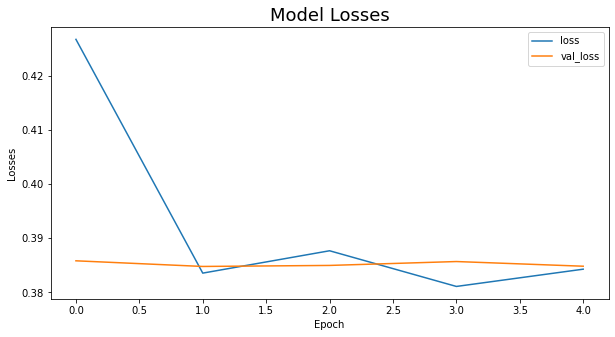

In [34]:
losses[['loss','val_loss']].plot(figsize=(10,5))
plt.title('Model Losses',fontsize=18)
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.show()

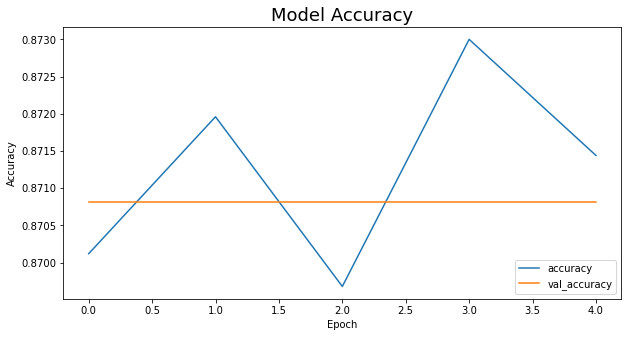

In [35]:
losses[['accuracy','val_accuracy']].plot(figsize=(10,5))
plt.title('Model Accuracy',fontsize=18)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()